In [3]:
import os
import yaml
from torch.utils.data import DataLoader
import argparse

from GeospatialFM.data import get_datasets
from GeospatialFM.models import *
# from utils import load_config
from torchgeo.samplers import RandomGeoSampler
from matplotlib import pyplot as plt

from transformers import TrainingArguments, Trainer
from transformers import AdamW, get_linear_schedule_with_warmup
from GeospatialFM.utils import setup, get_eval_fn
from GeospatialFM.data import *

%load_ext autoreload
%autoreload 2

/home/haozhesi/anaconda3/envs/sat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
device = torch.device('cuda:0')

In [5]:
args = {'exp_name': None,
        'config_file': 'GeospatialFM/configs/eurosat.yaml',
        'opts': None, 
        'output_dir': './results/configs/eurosat', 
        'save_config': False}
args = argparse.Namespace(**args)
args.debug = True
args

Namespace(exp_name=None, config_file='GeospatialFM/configs/eurosat.yaml', opts=None, output_dir='./results/configs/eurosat', save_config=False, debug=True)

In [6]:
cfg, _ = setup(args)

In [7]:
training_args = TrainingArguments(**cfg['TRAINER'])
model = get_model(cfg['MODEL'])
model = model.to(device)
train_ds, val_ds, test_ds = get_datasets(cfg['DATASET'])
compute_metrics = get_eval_fn(cfg['DATASET'])

In [8]:
len(train_ds)+len(val_ds)

21600

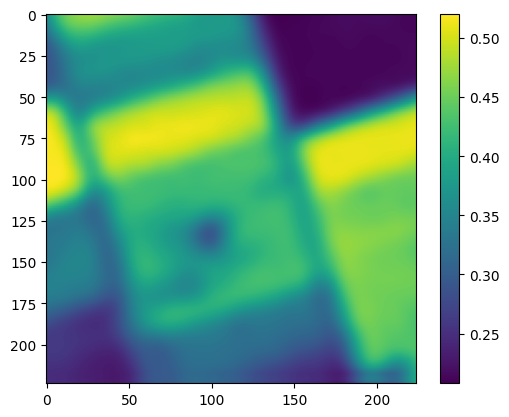

In [17]:
plt.imshow(test_ds[0]['image'][-1])
plt.colorbar()

In [15]:
len(test_ds)

5400

In [14]:
len(val_ds)

5400

In [1]:
21600/5400

4.0

In [7]:
trainer = Trainer(
    model=model,                # the instantiated 🤗 Transformers model to be trained
    args=training_args,                   # training arguments, defined above
    train_dataset=train_ds,    # training dataset
    eval_dataset=val_ds,      # evaluation dataset
    compute_metrics=compute_metrics,
)

In [8]:
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 160.00 MiB (GPU 3; 47.54 GiB total capacity; 512 bytes already allocated; 84.19 MiB free; 2.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

torchgeo.datasets.eurosat.EuroSAT

In [2]:
import torchgeo.datasets as tgds
import torchgeo.datamodules as tgdm

/home/haozhesi/anaconda3/envs/sat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
dm = getattr(tgdm, 'EuroSATDataModule')
ds = getattr(tgds, 'EuroSAT')

In [4]:
mean, std = dm.mean, dm.std

In [5]:
import torchvision.transforms as transforms

In [6]:
transforms.Normalize(mean, std)()

Normalize(mean=tensor([1354.4055, 1118.2440, 1042.9298,  947.6262, 1199.4729, 1999.7909,
        2369.2229, 2296.8262,  732.0834,   12.1133, 1819.0103, 1118.9240,
        2594.1409]), std=tensor([ 245.7176,  333.0078,  395.0925,  593.7505,  566.4170,  861.1840,
        1086.6313, 1117.9817,  404.9198,    4.7758, 1002.5877,  761.3032,
        1231.5858]))

In [11]:
ds('GeospatialFM/data/EuroSAT')

RuntimeError: Dataset not found in `root` directory and `download=False`, either specify a different `root` directory or use `download=True` to automatically download the dataset.

In [3]:
COMMON_INIT = {
    "learning_rate": 'lr',
    'weight_decay': 'wd',
}

In [7]:
COMMON_INIT.get('apple', 'apple')

'apple'

In [24]:
import torch
import timm

In [25]:
timm.list_models("vit*")

['vit_base_patch8_224',
 'vit_base_patch14_dinov2',
 'vit_base_patch16_18x2_224',
 'vit_base_patch16_224',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_384',
 'vit_base_patch16_clip_224',
 'vit_base_patch16_clip_384',
 'vit_base_patch16_gap_224',
 'vit_base_patch16_plus_240',
 'vit_base_patch16_rpn_224',
 'vit_base_patch16_xp_224',
 'vit_base_patch32_224',
 'vit_base_patch32_384',
 'vit_base_patch32_clip_224',
 'vit_base_patch32_clip_384',
 'vit_base_patch32_clip_448',
 'vit_base_patch32_plus_256',
 'vit_base_r26_s32_224',
 'vit_base_r50_s16_224',
 'vit_base_r50_s16_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50d_224',
 'vit_giant_patch14_224',
 'vit_giant_patch14_clip_224',
 'vit_giant_patch14_dinov2',
 'vit_gigantic_patch14_224',
 'vit_gigantic_patch14_clip_224',
 'vit_gigantic_patch16_224_ijepa',
 'vit_huge_patch14_224',
 'vit_huge_patch14_224_ijepa',
 'vit_huge_patch14_clip_224',
 'vit_huge_patch14_clip_336',
 'vit_huge_patch14_xp_224',
 'vit_huge_patch16_448_ijepa',
 'vi

In [26]:
model_name = "vit_base_patch8_224"
model = timm.create_model(model_name, pretrained=False)

In [27]:
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(8, 8), stride=(8, 8))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity()
  